In [2]:
from collections import Counter
import pandas as pd
import numpy as np

In [5]:
train_df = pd.read_csv('C:/ZhangLI/Codes/DataSet/新闻文本分类/train_set.csv', sep='\t', nrows=100)
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


1. 句子长度
2. 类别分布
3. 字符分布
{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

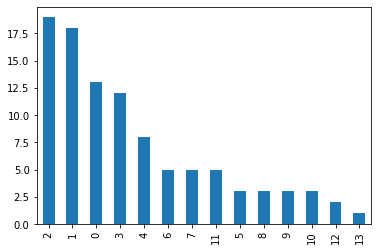

In [11]:
# 句子长度
# 类别分布
# 字符分布
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))

# 新闻类别分布
train_df['label'].value_counts().plot(kind='bar')
# plt.hist(train_df.text_len, bins=200)

In [18]:
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
# 可以看出每个词出现的次数 ，在词之前需要进行分词


In [40]:
# homework
def get_cell_len(s):
    r = []
    for i in s.split('3750'):
        for ii in i.split('900'):
            r += ii.split('648')
    return len([i for i in r if i != ''])
train_df['juzi_len'] = train_df['text'].apply(lambda x: get_cell_len(x))
train_df.head()
mean(train_df.juzi_len)
# 每类新闻中出现次数最多的字符
train_df.groupby('label').apply(lambda x: sorted(Counter(' '.join(x.text).split(' ')).items(), key=lambda x: x[1], reverse=True)[0])

label
0     (3750, 610)
1     (3750, 531)
2     (3750, 956)
3     (3750, 239)
4      (3750, 78)
5     (3750, 193)
6     (3750, 491)
7     (3750, 214)
8      (3750, 68)
9      (3750, 51)
10    (3750, 152)
11    (3750, 102)
12     (4464, 59)
13       (648, 6)
dtype: object

1. One-hot 
2. Bag of Words

我 爱 北 京 天 安 门
`[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]`

我 喜 欢 上 海
`[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]`

3. N-gram
加入相邻单词组成新单词

4. TF-IDF term frequency–inverse document frequency
词频次数
逆文档次数
TF(t) = 该词语在文档中出现的频率/当前文档中词的总数
IDT(t) = log(文档总数 / 出现该词的文档总数)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'hello hello hello hello',
    'didi',
    'sun sun',
    'moon moon moon',
    'ace'
]
vectorizer = CountVectorizer(max_features=5)
vectorizer.fit_transform(corpus)
vectorizer.vocabulary_

{'hello': 2, 'didi': 1, 'sun': 4, 'moon': 3, 'ace': 0}

In [3]:
# word of bagging + RidgeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

train_df = pd.read_csv('C:/ZhangLI/Codes/DataSet/新闻文本分类/train_set.csv', sep='\t', nrows=15000)

vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))
# 0.74

0.741494277019762


In [58]:
vectorizer = CountVectorizer(max_features=300)
train_test = vectorizer.fit_transform(train_df['text'])
vectorizer.vocabulary_
train_test.toarray()
vectorizer.get_feature_names()

['1018',
 '1031',
 '1036',
 '1066',
 '1070',
 '1080',
 '1099',
 '1141',
 '1215',
 '1277',
 '1324',
 '1344',
 '1363',
 '1375',
 '1394',
 '1401',
 '1407',
 '1460',
 '1465',
 '150',
 '151',
 '1519',
 '1567',
 '1633',
 '1635',
 '1647',
 '1667',
 '1679',
 '1699',
 '1702',
 '1722',
 '1731',
 '1734',
 '1736',
 '1767',
 '1779',
 '1815',
 '1854',
 '1859',
 '1866',
 '1871',
 '1877',
 '1903',
 '1906',
 '1913',
 '192',
 '1920',
 '1985',
 '2073',
 '2087',
 '2106',
 '2107',
 '2109',
 '2112',
 '2119',
 '2197',
 '2210',
 '2212',
 '2252',
 '2265',
 '2289',
 '23',
 '2304',
 '2313',
 '2364',
 '2376',
 '2380',
 '2400',
 '2461',
 '2465',
 '2471',
 '2489',
 '2490',
 '25',
 '2515',
 '2538',
 '2539',
 '2541',
 '2549',
 '2555',
 '2595',
 '2597',
 '2614',
 '264',
 '2662',
 '2693',
 '2729',
 '2770',
 '2799',
 '281',
 '2827',
 '2828',
 '2859',
 '2923',
 '2967',
 '2975',
 '2986',
 '299',
 '3038',
 '3068',
 '307',
 '3099',
 '3154',
 '3166',
 '3220',
 '3223',
 '3263',
 '3272',
 '3300',
 '3370',
 '3374',
 '340',
 '34

In [12]:
val_pred
# 对文档全的词语金勋count
# 当前文档的词count
# 对某个词 这个词出现的频率
# 对某个词 出现这个词的文档个数
# TF-IDF +  RidgeClassifier

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

train_df = pd.read_csv('C:/ZhangLI/Codes/DataSet/新闻文本分类/train_set.csv', sep='\t', nrows=15000)

tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=3000)
train_test = tfidf.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))
# 0.87

0.8721598830546126


In [ ]:
# 得到的维度比较好，训练时间长
# 没有考虑词与词之间的关系